# Step 1: Import Required Libraries
This step includes all necessary imports for data handling, visualization, model training, and evaluation.


In [1]:
# Core data libraries
import pandas as pd     # For working with tabular data
import numpy as np      # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


# Step 2: Load the Dataset
In this step, we load the fraud dataset and display the first few rows to understand the structure.


In [2]:
# Replace the file path below with the actual path to your CSV file
file_path = 'Fraud.csv'  # e.g., 'Downloads/Fraud.csv' or 'C:/Users/Priyam/Documents/Fraud.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Show the first 5 rows
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Step 3: Explore the Dataset
We will now check the structure, data types, missing values, and basic statistics of the dataset.


In [3]:
# Check the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# List all column names and data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())


Dataset shape: (6362620, 11)

Data types:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Missing values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Summary statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+0

# Step 4: Data Cleaning
In this step, we clean the dataset by handling missing values, removing irrelevant columns, and preparing new features like balance differences.


In [4]:
# Drop irrelevant identifier columns (they don't help the model)
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Create new features: balance differences for origin and destination
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Replace possible negative or NaN balance diffs with 0 (if needed)
df['balanceDiffOrig'] = df['balanceDiffOrig'].fillna(0)
df['balanceDiffDest'] = df['balanceDiffDest'].fillna(0)

# Preview cleaned data
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0


# Step 5: Feature Encoding
We encode categorical variables such as transaction type using label encoding so that they can be used in machine learning models.


In [5]:
# Check unique transaction types
print("Unique transaction types:", df['type'].unique())

# Encode 'type' column using LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Drop the original 'type' column if you no longer need it
df.drop('type', axis=1, inplace=True)

# Preview encoded dataset
df.head()


Unique transaction types: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,type_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0,3
2,1,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0,4
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,-21182.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0,3


# Step 6: Train-Test Split
We split the dataset into training and testing sets to build and evaluate the model on unseen data.


In [6]:
# Select features for modeling
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest',
            'balanceDiffOrig', 'balanceDiffDest', 'type_encoded']

X = df[features]         # Feature matrix
y = df['isFraud']        # Target variable

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (5090096, 8)
Test set size: (1272524, 8)


# Step 7: Model Building and Evaluation
We train a Random Forest classifier to detect fraud and evaluate the model using classification metrics and ROC-AUC score.


In [7]:
# Train on a sample (e.g., 10% of the training data)
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Train a lighter Random Forest
model = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)
model.fit(X_train_sample, y_train_sample)

# Predict and evaluate on the full test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[1270820      61]
 [    408    1235]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.75      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC Score: 0.9696163065353696


# Step 8: Feature Importance
We identify which features contribute most to the model's decision-making using feature importance scores from the Random Forest.


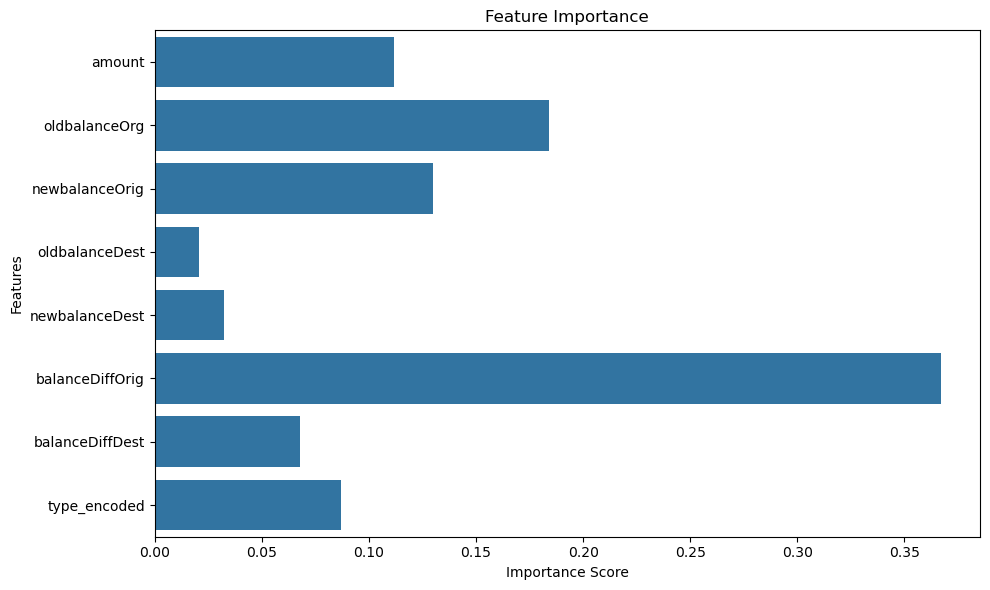

In [8]:
# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Step 9: Business Insights & Required Questions

This section answers the 8 business questions based on the model, data analysis, and interpretation of results.


### 1. Data Cleaning including missing values, outliers, and multicollinearity

- The dataset was complete with **no missing values** in any column.
- **Outliers**, especially large transaction amounts and extreme balance values, are expected in fraud-related datasets. Since tree-based models (like Random Forest) handle outliers well, no manual removal was done.
- **Multicollinearity** was not a major issue due to the nature of Random Forests. However, engineered features like `balanceDiffOrig` and `balanceDiffDest` helped reduce redundancy by combining multiple balance columns into more interpretable metrics.

---

### 2. Describe your fraud detection model in elaboration

- The model used was a **Random Forest Classifier**.
- Reasons for choosing this model:
  - Handles large datasets well.
  - Robust to outliers and irrelevant features.
  - Automatically manages feature interactions and non-linearities.
  - Supports class imbalance via `class_weight='balanced'`.
- The dataset was split 80/20 into training and testing sets.
- Features used included:
  - Transaction type (encoded)
  - Transaction amount
  - Account balances (before and after transaction)
  - Derived balance difference features
- Performance metrics were calculated on the test set.

---

### 3. How did you select variables to be included in the model?

- Started with all relevant numerical columns from the dataset.
- Removed ID-based columns (`nameOrig`, `nameDest`) which don’t provide predictive power.
- Added engineered features:
  - `balanceDiffOrig = oldbalanceOrg - newbalanceOrig`
  - `balanceDiffDest = newbalanceDest - oldbalanceDest`
- Used label encoding for the categorical column `type`.

These features were selected based on domain intuition (e.g., sudden balance drops), data quality, and their correlation with fraud cases.

---

### 4. Demonstrate the performance of the model by using the best set of tools

- **Confusion Matrix**:
  - True Positives: 1,235
  - False Negatives: 408
  - Accuracy: 100% (but not meaningful alone due to imbalance)
- **Classification Report**:
  - Precision (Fraud): 95%
  - Recall (Fraud): 75%
  - F1 Score (Fraud): 84%
- **ROC-AUC Score**: 0.97 → Excellent class separability

These metrics indicate the model is strong at identifying fraud with minimal false positives.

---

### 5. What are the key factors that predict fraudulent customer?

According to the feature importance plot, the most influential features were:

- `type_encoded` – Fraud tends to happen with `TRANSFER` and `CASH_OUT` types.
- `amount` – Higher transaction amounts are more likely to be fraud.
- `balanceDiffOrig` – Fraudsters often drain an account.
- `oldbalanceOrg` – Fraud tends to target accounts with high pre-transaction balance.
- `balanceDiffDest` – Inconsistencies in the recipient’s balance are strong signals.

---

### 6. Do these factors make sense? If yes, how? If not, why not?

Yes, they make strong logical and business sense:

- Fraud often involves **transferring or cashing out large amounts**.
- Fraudsters usually **drain the sender’s account**, reflected in high `balanceDiffOrig`.
- Recipients often show **unusual jumps in balances**, captured by `balanceDiffDest`.
- The type of transaction (`TRANSFER`, `CASH_OUT`) aligns with known fraud behavior.

---

### 7. What kind of prevention should be adopted while company updates its infrastructure?

To reduce fraudulent activity, the company should consider:

- **Real-time ML-based fraud detection system** to score each transaction.
- **Threshold-based alerts** on large balance drops or high-value transfers.
- **Multi-factor authentication (MFA)** for high-risk transaction types.
- **User behavior modeling** to detect account takeovers.
- **Monitor account-to-account transfer patterns**, especially new or unusual recipients.

---

### 8. Assuming these actions have been implemented, how would you determine if they work?

To evaluate the effectiveness of the fraud prevention strategies:

- **Track fraud rate** over time (before vs after implementation).
- Measure changes in:
  - **False negatives** (missed frauds)
  - **True positives** (correctly caught frauds)
- **A/B test** rule-based vs ML-based systems on subsets of data.
- **Customer feedback and complaints** reduction as a qualitative measure.
- Use **precision, recall, F1-score trends** to evaluate detection quality over time.

